# Beta model With OCR

In [31]:
# !/home/ubuntu/anaconda3/envs/tensorflow2_p37/bin/python -m pip install --upgrade pip

In [32]:
## 필수 라이브러리 중 일부 pip install

# !sudo apt update
# !sudo apt install tesseract-ocr
# !sudo apt install libtesseract-dev
# !pip3 install keras-ocr

In [1]:
# 필요한 라이브러리 가져오기
import albumentations as A
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from glob import glob
import keras_ocr
import pytesseract

In [2]:
img_dir = glob("./user_input_source/*")
for item in img_dir:
    print(item)
user_input_img = img_dir[0]

./user_input_source/test_userinput.png


In [38]:
user_input = cv2.imread(user_input_img)
user_input = cv2.cvtColor(user_input, cv2.COLOR_BGR2RGB)
copied_user_input = user_input.copy()
horizon_size = copied_user_input.shape[1]
croped_user_input = copied_user_input[0:, int(horizon_size/3):int(2*(horizon_size/3))]

transform_model_to_gray = A.Compose([
    A.Resize(height=960, width=260, always_apply=True),
    A.ToGray(always_apply=True),
])

transformed_user_input = transform_model_to_gray(image=croped_user_input)["image"]
gray_img = 255 - transformed_user_input

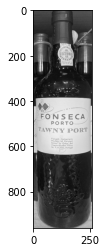

In [39]:
plt.imshow(transformed_user_input)

In [34]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/ubuntu/.keras-ocr/craft_mlt_25k.h5
Looking for /home/ubuntu/.keras-ocr/crnn_kurapan.h5


In [35]:
images = [
    keras_ocr.tools.read(url) for url in [
        transformed_user_input,
        gray_img
    ]
]

prediction_groups = pipeline.recognize(images)

In [41]:
print(transformed_user_input.shape)

(960, 260, 3)


In [36]:
for item in prediction_groups[0]:
    print(item[0])

lb
37106
dt
1815
fonseca
porto
tawny
port
a
fonsece
guimmaraons
prod
portugal
wol
ot
5
laded
quinta
and
dy
tineyard
bottlers
vinhos
sn
n
gala
portugal


Figure(1440x1440) [<AxesSubplot:> <AxesSubplot:>]


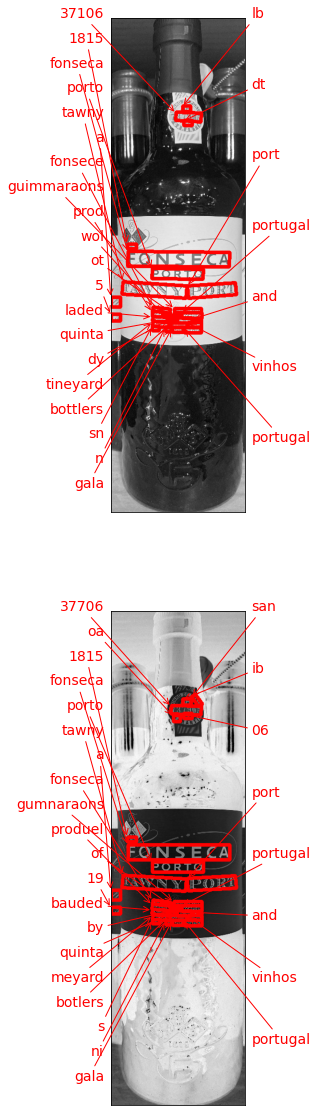

In [40]:
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

In [30]:
result_list = []
for item in prediction_groups[1]:
    if len(item[0]) > 2:
        result_list.append(item[0])
for i in result_list:
    print(i, end=' ')

13710 est 1815 fonseca porto tawny port fonseca guimaraens product portugal bottled quinta and vineyard bottlers vinhos van gaiag portugal 